### Importação dos dados



In [ ]:
import pandas as pd
import matplotlib.pyplot as mp
import numpy as np

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja1.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#**Objetivo da Análise**

O objetivo deste estudo é avaliar o desempenho das quatro lojas do Senhor João com base nos dados de vendas, identificando qual delas deve ser vendida. Os fatores considerados incluem analise do faturamento total, vendas por categoria,produtos mais/menos vendidos, avaliações de clientes e valor médio de frete, suportados pelas análises e gráficos gerados.


#1. Análise do faturamento



In [ ]:
faturamento_loja1 = sum(loja1['Preço'])
faturamento_loja2 = sum(loja2['Preço'])
faturamento_loja3 = sum(loja3['Preço'])
faturamento_loja4 = sum(loja4['Preço'])

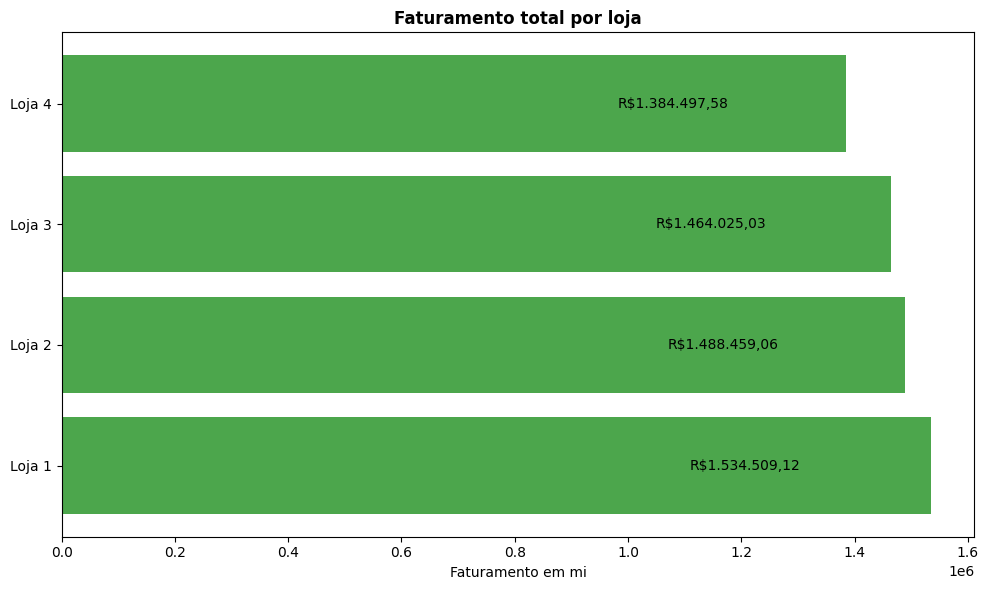

In [ ]:
faturamentos = [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

mp.figure(figsize=(10, 6))
barras = mp.barh(lojas, faturamentos, color = 'green', alpha=0.7 )
mp.title('Faturamento total por loja', fontweight='bold')
mp.xlabel('Faturamento em mi')

for barra, valor in zip(barras, faturamentos):
    largura = barra.get_width()
    pos_x = largura * 0.85
    pos_y = barra.get_y() + barra.get_height() / 2
    texto = f'R${valor:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.')
    mp.text(pos_x, pos_y, texto, ha='right', va='center', fontsize = 10)

mp.tight_layout()
mp.show()

***Faturamento Total:***

A Loja 1 lidera com o maior faturamento acumulado, impulsionado pelo alto volume de vendas de móveis e  eletrônicos, enquanto a Loja 4 apresenta os menores valores de venda total. Com o gráfico de barras, fica nítido essa diferença de praticamente R\$150.000,00, mostrando a Loja 1 como responsável por cerca de aproximadamente 26,15% do faturamento geral.

# 2. Vendas por Categoria

In [ ]:

quantidade_loja1 =loja1['Categoria do Produto']. value_counts()
quantidade_loja2 =loja2['Categoria do Produto']. value_counts()
quantidade_loja3 =loja3['Categoria do Produto']. value_counts()
quantidade_loja4 =loja4['Categoria do Produto']. value_counts()

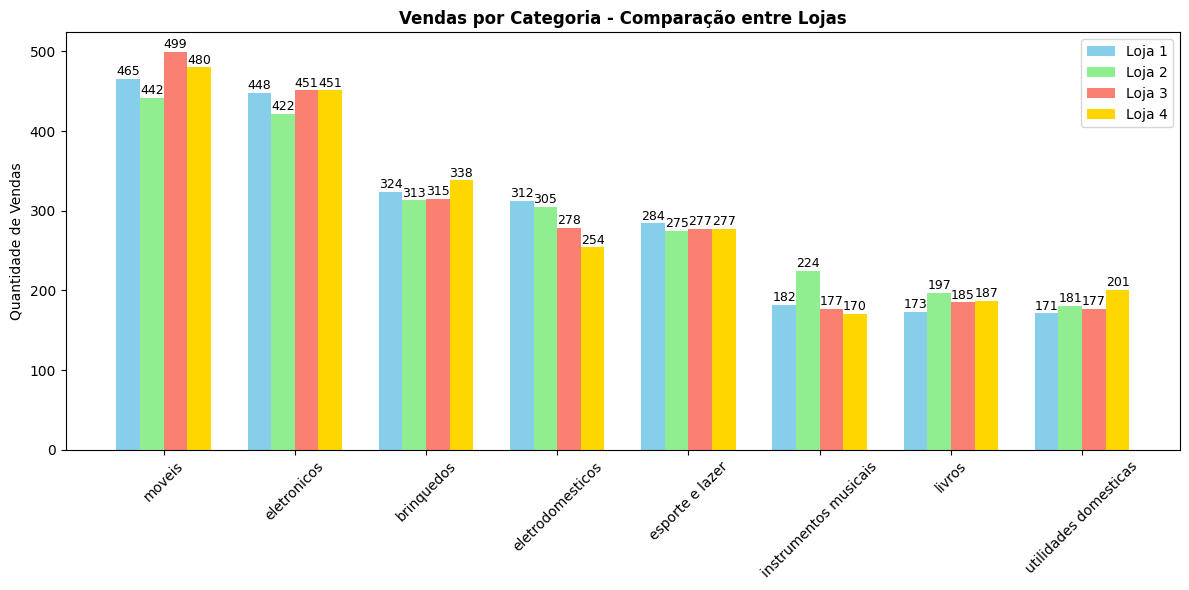

In [ ]:
categorias_ordenadas = quantidade_loja1.index.tolist()

loja1_reordenada = quantidade_loja1.reindex(categorias_ordenadas)
loja2_reordenada = quantidade_loja2.reindex(categorias_ordenadas)
loja3_reordenada = quantidade_loja3.reindex(categorias_ordenadas)
loja4_reordenada = quantidade_loja4.reindex(categorias_ordenadas)

valores_loja1 = loja1_reordenada.values
valores_loja2 = loja2_reordenada.values
valores_loja3 = loja3_reordenada.values
valores_loja4 = loja4_reordenada.values

n_categorias = len(categorias_ordenadas)
x_posicoes = np.arange(n_categorias)
width = 0.18

mp.figure(figsize=(12, 6))

barras_loja1 = mp.bar(x_posicoes - 1.5*width, valores_loja1, width, label='Loja 1', color='skyblue')
barras_loja2 = mp.bar(x_posicoes - 0.5*width, valores_loja2, width, label='Loja 2', color='lightgreen')
barras_loja3 = mp.bar(x_posicoes + 0.5*width, valores_loja3, width, label='Loja 3', color='salmon')
barras_loja4 = mp.bar(x_posicoes + 1.5*width, valores_loja4, width, label='Loja 4', color='gold')

for barras, valores in zip([barras_loja1, barras_loja2, barras_loja3, barras_loja4],
                          [valores_loja1, valores_loja2, valores_loja3, valores_loja4]):
    for barra, valor in zip(barras, valores):
        altura = barra.get_height()
        mp.text(barra.get_x() + barra.get_width()/2, altura + 1, str(int(valor)), ha='center', va='bottom', fontsize=9)

mp.xticks(x_posicoes, categorias_ordenadas, rotation=45)
mp.ylabel('Quantidade de Vendas')
mp.title('Vendas por Categoria - Comparação entre Lojas', fontweight='bold')
mp.legend()
mp.tight_layout()
mp.show()

***Categorias de Produtos:***

Móveis e eletrônicos dominam como categorias mais vendida em todas as lojas, já instrumentos musicais, livros e utilidades domésticas, performam como as menos vendidas.

# 3. Média de Avaliação das Lojas


In [ ]:
media_avaliacao_loja1 = loja1['Avaliação da compra'].mean()
media_avaliacao_loja2 = loja2['Avaliação da compra'].mean()
media_avaliacao_loja3 = loja3['Avaliação da compra'].mean()
media_avaliacao_loja4 = loja4['Avaliação da compra'].mean()

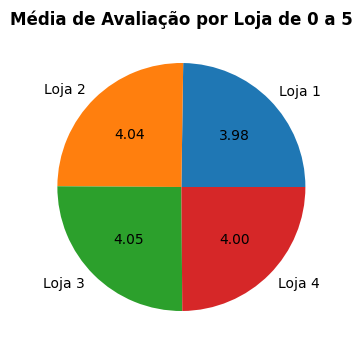

In [ ]:
medias = [media_avaliacao_loja1, media_avaliacao_loja2, media_avaliacao_loja3, media_avaliacao_loja4]
nomes_lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

mp.figure(figsize=(4, 8))
wedges, texts, autotexts = mp.pie(medias, labels=nomes_lojas, autopct='%1.1f%%')
mp.title('Média de Avaliação por Loja de 0 a 5', fontweight='bold')

for autotext, media in zip(autotexts, medias):
    autotext.set_text(f'{media:.2f}')

mp.show()


***Avaliações de Clientes:***

A Loja 3 possui a melhor média de avaliações (4.05/5), refletindo satisfação elevada, ao passo que a Loja 1 fica em 3.98/5. Visualizações no gráfico de pizza ilustram essa variação.

# 4. Produtos Mais e Menos Vendidos

In [ ]:
produtos_loja1 =loja1['Produto'].value_counts()
mais_vendidos_loja1 = produtos_loja1.head()
menos_vendidos_loja1 = produtos_loja1.tail()

produtos_loja2 =loja2['Produto'].value_counts()
mais_vendidos_loja2 = produtos_loja2.head()
menos_vendidos_loja2 = produtos_loja2.tail()

produtos_loja3 =loja3['Produto'].value_counts()
mais_vendidos_loja3 = produtos_loja3.head()
menos_vendidos_loja3 = produtos_loja3.tail()

produtos_loja4 =loja4['Produto'].value_counts()
mais_vendidos_loja4 = produtos_loja4.head()
menos_vendidos_loja4 = produtos_loja4.tail()

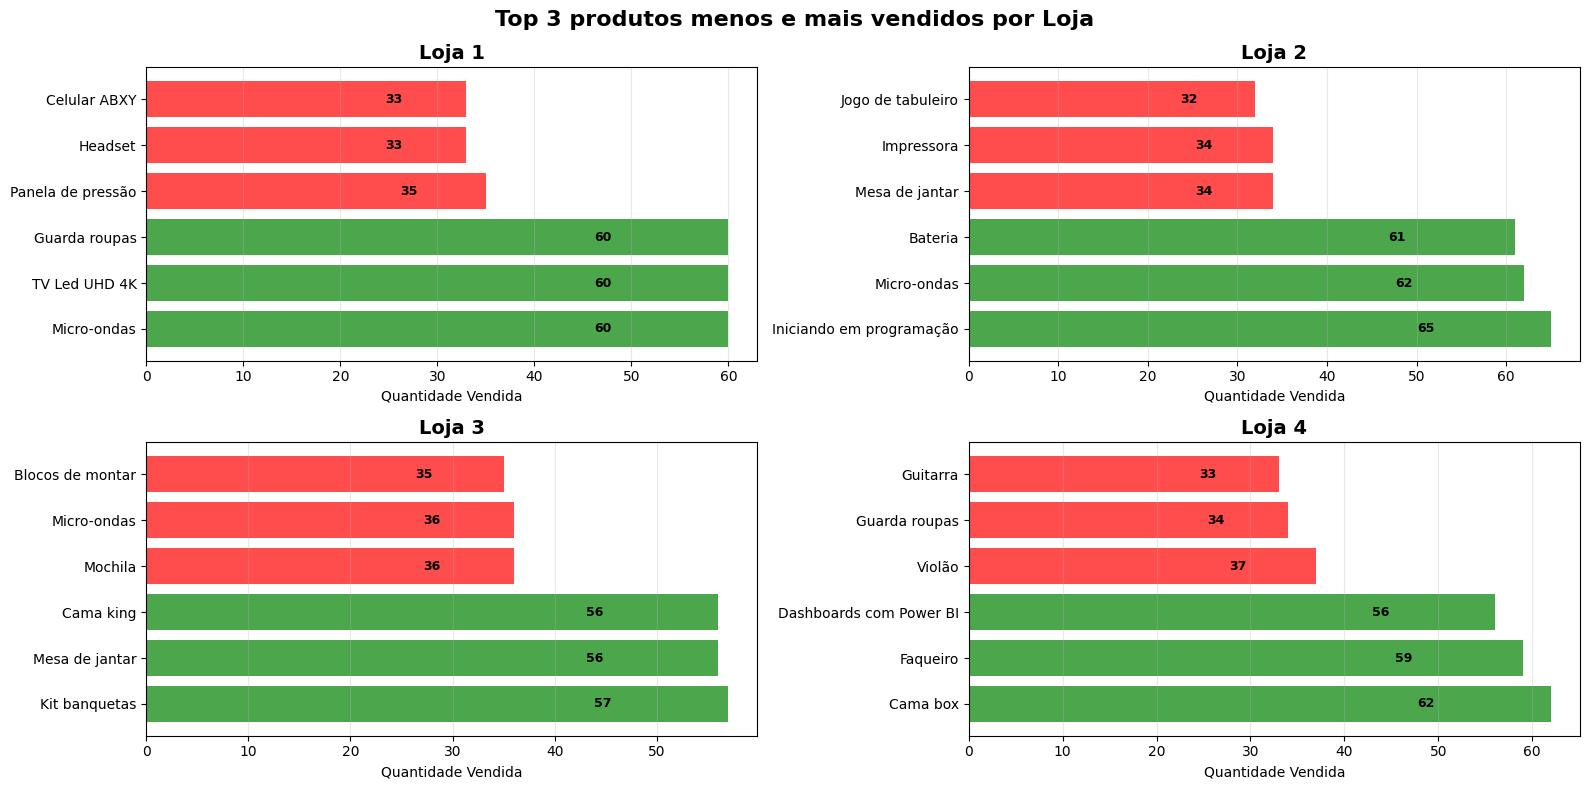

In [ ]:
top_produtos = [mais_vendidos_loja1.head(3).index.tolist(),
                mais_vendidos_loja2.head(3).index.tolist(),
                mais_vendidos_loja3.head(3).index.tolist(),
                mais_vendidos_loja4.head(3).index.tolist()]

top_qtds = [mais_vendidos_loja1.head(3).values.tolist(),
            mais_vendidos_loja2.head(3).values.tolist(),
            mais_vendidos_loja3.head(3).values.tolist(),
            mais_vendidos_loja4.head(3).values.tolist()]

bottom_produtos = [menos_vendidos_loja1.tail(3).index.tolist(),
                   menos_vendidos_loja2.tail(3).index.tolist(),
                   menos_vendidos_loja3.tail(3).index.tolist(),
                   menos_vendidos_loja4.tail(3).index.tolist()]

bottom_qtds = [menos_vendidos_loja1.tail(3).values.tolist(),
               menos_vendidos_loja2.tail(3).values.tolist(),
               menos_vendidos_loja3.tail(3).values.tolist(),
               menos_vendidos_loja4.tail(3).values.tolist()]

fig, axes = mp.subplots(2, 2, figsize=(16, 8))
axes = axes.flatten()
fig.suptitle('Top 3 produtos menos e mais vendidos por Loja', fontsize=16, fontweight='bold')

lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

for i, (ax, loja) in enumerate(zip(axes, lojas)):
    y_posicoes = [0, 1, 2, 3, 4, 5]

    todos_produtos = top_produtos[i] + bottom_produtos[i]
    todas_qtds = top_qtds[i] + bottom_qtds[i]

    ax.set_yticks(y_posicoes)
    ax.set_yticklabels(todos_produtos, fontsize=10)

    ax.barh(y_posicoes[:3], top_qtds[i], color='green', alpha=0.7)
    ax.barh(y_posicoes[3:], bottom_qtds[i], color='red', alpha=0.7)

    ax.set_title(f'{loja}', fontsize=14, fontweight='bold')
    ax.set_xlabel('Quantidade Vendida')

    for j, (y_pos, qtd) in enumerate(zip(y_posicoes, todas_qtds)):
      ax.text(qtd*0.8, y_pos, str(int(qtd)), ha='right', va='center', fontweight='bold', fontsize=9)

    ax.grid(axis='x', alpha=0.3)

mp.tight_layout()
mp.show()

***Produtos menos e mais vendidos:***

Itens para a casa, eletrônicos e livros, aparecem sempre nos top 3 de vendas das lojas, sendo micro-ondas o item mais vendido. Já instrumentos musicais são os itens menos vendidos.


# 5. Frete Médio por Loja

In [ ]:
media_frete_loja1 = loja1['Frete'].mean()
media_frete_loja2 = loja2['Frete'].mean()
media_frete_loja3 = loja3['Frete'].mean()
media_frete_loja4 = loja4['Frete'].mean()

print(media_frete_loja1, media_frete_loja2, media_frete_loja3, media_frete_loja4)

34.69180491551149 33.62194065817927 33.07446427411743 31.278997081841727


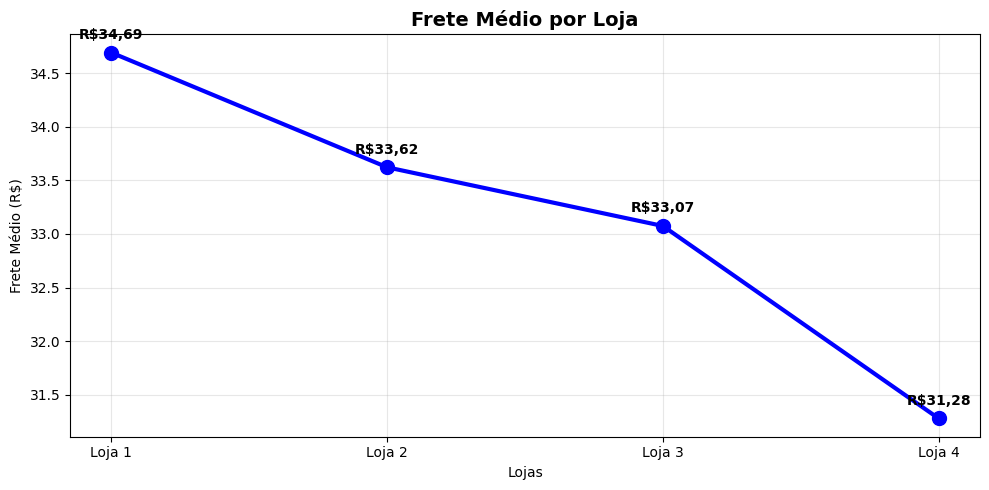

In [ ]:
medias_frete = [media_frete_loja1, media_frete_loja2, media_frete_loja3, media_frete_loja4]
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

mp.figure(figsize=(10, 5))
mp.plot(lojas, medias_frete, marker='o', linewidth=3, markersize=10, color='blue')
mp.title('Frete Médio por Loja', fontweight='bold', fontsize=14)
mp.xlabel('Lojas')
mp.ylabel('Frete Médio (R$)')
mp.grid(True, alpha=0.3)

for i, frete in enumerate(medias_frete):
    texto = f'R${frete:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.')
    mp.text(i, frete + 0.1, texto, ha='center', va='bottom', fontweight='bold')

mp.tight_layout()
mp.show()


***Frete Médio:***

A Loja 4 oferece o frete mais barato, sendo R\$31,28 em média, enquanto a Loja 1 registra R\$34,69 em média.

# **Recomendação**

Recomenda-se vender a Loja 4 devido ao menor faturamento total, apesar do frete competitivo, pois não compensa o baixo volume de vendas em comparação às demais. Mantenha Loja 1 pelo alto faturamento, Loja 3 pela excelência em satisfação de clientes e Loja 2 pelo equilíbrio. Foque melhorias em categorias fracas (instrumentos musicais) nas lojas retidas para maximizar rentabilidade.